In [6]:
import torch

from cheetah import (
    BPM,
    Drift,
    HorizontalCorrector,
    ParameterBeam,
    Segment,
    VerticalCorrector,
)

In [7]:
segment = Segment(
    elements=[
        BPM(name="BPM1SMATCH"),
        Drift(length=torch.tensor(1.0)),
        BPM(name="BPM6SMATCH"),
        Drift(length=torch.tensor(1.0)),
        VerticalCorrector(length=torch.tensor(0.3), name="V7SMATCH"),
        Drift(length=torch.tensor(0.2)),
        HorizontalCorrector(length=torch.tensor(0.3), name="H10SMATCH"),
        Drift(length=torch.tensor(7.0)),
        HorizontalCorrector(length=torch.tensor(0.3), name="H12SMATCH"),
        Drift(length=torch.tensor(0.05)),
        BPM(name="BPM13SMATCH"),
    ]
)

In [8]:
segment.V7SMATCH.angle = torch.tensor(3.142e-3)

In [9]:
incoming_beam = ParameterBeam.from_parameters(
        sigma_xp=torch.tensor(2e-7), sigma_yp=torch.tensor(2e-7)
    )

In [10]:
outgoing_beam = segment.track(incoming_beam)

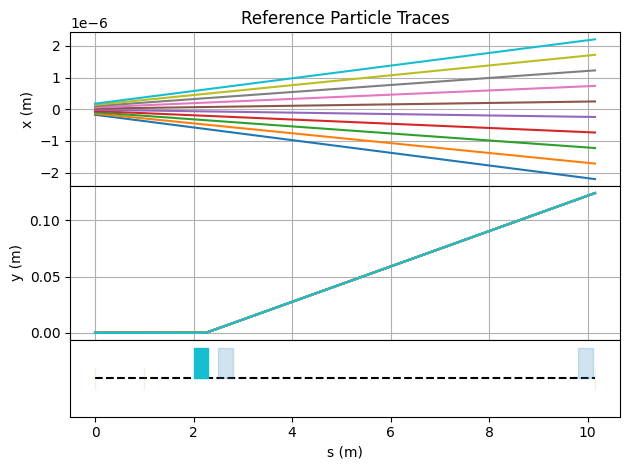

In [11]:
segment.plot_overview(beam=incoming_beam)